In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy import stats
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
# https://stackoverflow.com/a/37347783/7060068
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000

In [97]:
# Let’s change the default plot size so we have a better view of our line plots:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

## 20 tasks in each episode and 5 actions for each edge node

In [130]:
# get all names from the folder
# https://stackoverflow.com/a/29206464/7060068
import os

path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/edge_cloud_independent_ppo_with_history_5-actions_env-3'
dir_list = os.listdir(path)
print(dir_list)

['PPO_EdgeCloudEnv1_a4dc8_00000_0_lr=0.0001,train_batch_size=3000_2021-11-02_21-41-32', 'PPO_EdgeCloudEnv1_e1c52_00000_0_lr=0.0001,train_batch_size=3000_2021-11-02_18-22-48', 'PPO_EdgeCloudEnv1_3a5ea_00000_0_lr=0.0001,train_batch_size=3000_2021-11-02_18-10-58', 'PPO_EdgeCloudEnv1_a8033_00001_1_lr=0.001,train_batch_size=3000_2021-11-02_21-41-37', 'PPO_EdgeCloudEnv1_a79ca_00000_0_lr=0.0001,train_batch_size=3000_2021-11-02_21-41-36', 'basic-variant-state-2021-11-02_18-22-54.json', 'PPO_EdgeCloudEnv1_a79d9_00001_1_lr=0.001,train_batch_size=3000_2021-11-02_21-41-36', 'PPO_EdgeCloudEnv1_e3b84_00000_0_lr=0.0001,train_batch_size=3000_2021-11-02_18-22-51', 'PPO_EdgeCloudEnv1_a8038_00001_1_lr=0.001,train_batch_size=3000_2021-11-02_21-41-37', 'PPO_EdgeCloudEnv1_2c2ff_00003_3_lr=0.0001,train_batch_size=4000_2021-11-03_05-30-37', 'PPO_EdgeCloudEnv1_a805a_00002_2_lr=1e-05,train_batch_size=3000_2021-11-02_21-41-37', 'PPO_EdgeCloudEnv1_e1d8c_00000_0_lr=0.0001,train_batch_size=3000_2021-11-02_18-22-48'

In [136]:
# read results in .json files
import json

hyperparamter_string = 'lr=0.0001,train_batch_size=3000_2021-11-03'

df_results = pd.DataFrame()
results = []
for folder in dir_list:
    file_path = f'{path}/{folder}/result.json'
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    # load data using Python JSON module
#     print(file_path)
    with open(file_path) as f:
        # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
        # https://stackoverflow.com/a/29312618/7060068
        for line in f:
            data = json.loads(line)
#             print(data)
#             break
            data_row = data['custom_metrics']

    #         df = pd.DataFrame.from_dict(data, index=0)
            # https://stackoverflow.com/a/17840195/7060068
            df = pd.DataFrame(data_row, index=[data['timesteps_total']])
            results.append(df)

df_results = pd.concat(results, axis=0)
df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean']]
print(len(df_results))
df_results.head()

12


,Social Welfare (Online Myopic)_mean,Social Welfare_mean,Social Welfare (Random Allocation)_mean,Social Welfare (All Bidding Zero)_mean
3040,2987.372606,1207.597981,1293.548990,1249.922616
6080,3015.357096,1193.236324,1331.417205,1201.990960
9120,3003.320628,1194.091759,1281.721196,1262.501807
12160,3007.104636,1167.752176,1308.861430,1316.786221
3040,3047.446597,1234.999169,1340.398498,1292.891535


### Online Myopic

Text(0.5, 0, 'Timesteps')

Text(0, 0.5, 'Mean Social Welfare')

(0.0, 3050.4502963972254)

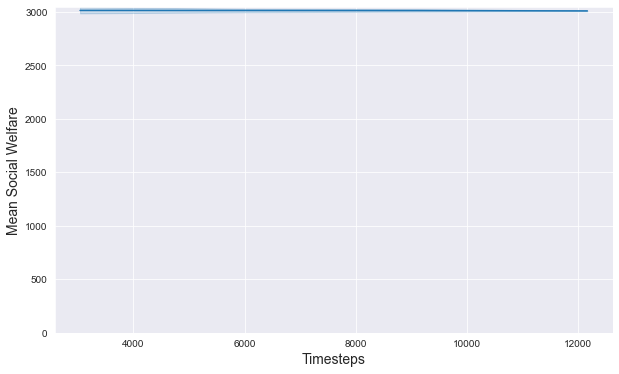

In [137]:
# plot the confidence interval for the mean
# https://stackoverflow.com/a/44941463/7060068

p = sns.lineplot(x=df_results.index, y='Social Welfare (Online Myopic)_mean', data=df_results)  # 2 actions (blue)
p.set_xlabel("Timesteps", fontsize = 14)
p.set_ylabel("Mean Social Welfare", fontsize = 14)
# https://stackoverflow.com/a/57101557/7060068
p.axes.set_ylim(0)

### All Bidding Zero

Text(0.5, 0, 'Timesteps')

Text(0, 0.5, 'Mean Social Welfare')

(0.0, 1322.5259843478593)

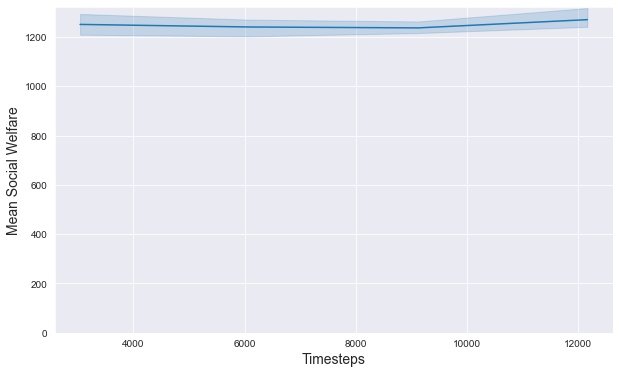

In [138]:
p = sns.lineplot(x=df_results.index, y='Social Welfare (All Bidding Zero)_mean', data=df_results)  # 2 actions (blue)
p.set_xlabel("Timesteps", fontsize = 14)
p.set_ylabel("Mean Social Welfare", fontsize = 14)
p.axes.set_ylim(0)

### MARL

Text(0.5, 0, 'Timesteps')

Text(0, 0.5, 'Mean Social Welfare')

(0.0, 1239.1000771603667)

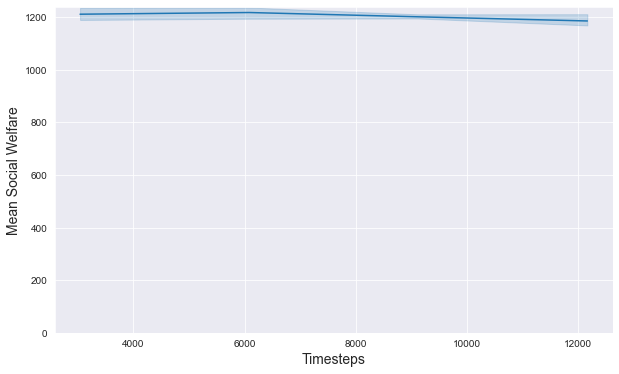

In [139]:
p = sns.lineplot(x=df_results.index, y='Social Welfare_mean', data=df_results)  # 2 actions (blue)
p.set_xlabel("Timesteps", fontsize = 14)
p.set_ylabel("Mean Social Welfare", fontsize = 14)
p.axes.set_ylim(0)

### Random Allocation

Text(0.5, 0, 'Timesteps')

Text(0, 0.5, 'Mean Social Welfare')

(0.0, 1345.9765873220044)

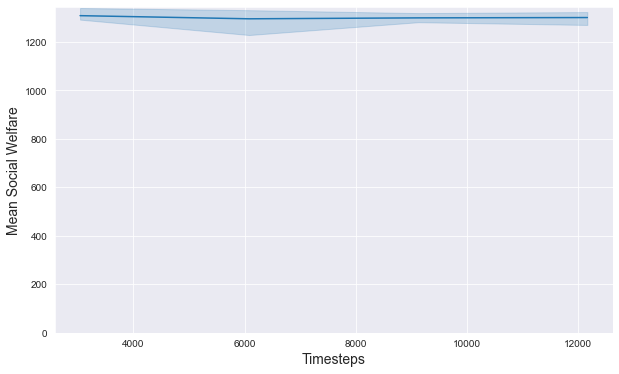

In [140]:
p = sns.lineplot(x=df_results.index, y='Social Welfare (Random Allocation)_mean', data=df_results)  # 2 actions (blue)
p.set_xlabel("Timesteps", fontsize = 14)
p.set_ylabel("Mean Social Welfare", fontsize = 14)
p.axes.set_ylim(0)

In [86]:
1/0

ZeroDivisionError: division by zero

## Use data from the progress.csv file.

In [7]:
# load from file
# https://thispointer.com/python-three-ways-to-check-if-a-file-is-empty/
# concatenating df1 and df2 along rows
# vertical_concat = pd.concat([df1, df2], axis=0)
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
hyperparamter_string = 'lr=0.0001,train_batch_size=3000'
df_results = pd.DataFrame()
for folder in dir_list:
    file_path = f'{path}/{folder}/progress.csv'
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    with open (file_path) as f:
        if os.stat(file_path).st_size != 0:
            df_f = pd.read_csv(f)
            if df_results.empty:
                df_results = df_f
            else:
                df_results = df_results.append(df_f, ignore_index = True)

In [8]:
print(len(df_results))
df_results.head()

357


,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,agent_timesteps_total,done,episodes_total,...,info/learner/default/learner_stats/allreduce_latency,info/learner/default/learner_stats/cur_kl_coeff,info/learner/default/learner_stats/cur_lr,info/learner/default/learner_stats/total_loss,info/learner/default/learner_stats/policy_loss,info/learner/default/learner_stats/vf_loss,info/learner/default/learner_stats/vf_explained_var,info/learner/default/learner_stats/kl,info/learner/default/learner_stats/entropy,info/learner/default/learner_stats/entropy_coeff
0,14951.943607,6661.389542,10686.041999,20.0,154,7,3080,9240,False,154,...,0.0,0.2,0.0001,3.424359e+06,-0.002127,3.424359e+06,0.005795,0.008954,1.600188,0.0
1,14318.974241,8328.678376,11074.965234,20.0,154,7,6160,18480,False,308,...,0.0,0.2,0.0001,3.645552e+06,0.001846,3.645552e+06,0.026189,0.012128,1.593240,0.0
2,15218.088859,7318.343723,10932.642307,20.0,154,7,9240,27720,False,462,...,0.0,0.2,0.0001,3.393351e+06,0.001760,3.393351e+06,0.035891,0.014833,1.582788,0.0
3,14304.079945,6638.035354,11179.813963,20.0,154,7,12320,36960,False,616,...,0.0,0.2,0.0001,3.439165e+06,0.003879,3.439165e+06,0.048657,0.015552,1.553997,0.0
4,14830.053690,6087.008121,11302.032003,20.0,154,7,15400,46200,False,770,...,0.0,0.2,0.0001,3.525264e+06,0.005538,3.525264e+06,0.069872,0.018805,1.562889,0.0


In [82]:
df_results1 = df_results

In [102]:
path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/edge_cloud_independent_ppo_with_history_2_actions'
dir_list = os.listdir(path)
hyperparamter_string = 'lr=0.0001,train_batch_size=3000'
df_results = pd.DataFrame()
for folder in dir_list:
    file_path = f'{path}/{folder}/progress.csv'
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    with open (file_path) as f:
        if os.stat(file_path).st_size != 0:
            df_f = pd.read_csv(f)
            if df_results.empty:
                df_results = df_f
            else:
                df_results = df_results.append(df_f, ignore_index = True)

<AxesSubplot:xlabel='timesteps_total', ylabel='episode_reward_mean'>

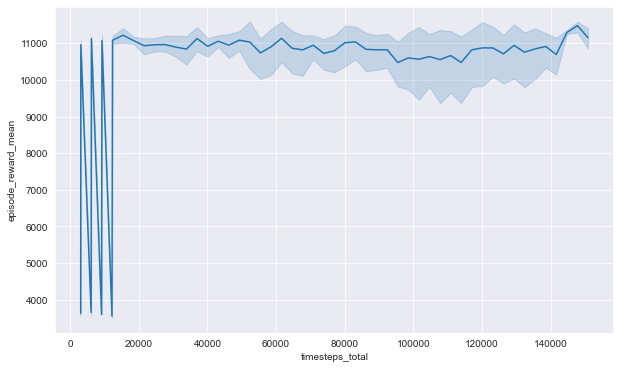

In [9]:
# plot the confidence interval for the mean
# dont't have customised measurements in the progress.csv file, maybe we need to get data from the *.json file.
sns.lineplot(x='timesteps_total',y='episode_reward_mean', data=df_results)  # 2 actions (blue)
# sns.lineplot(x='timesteps_total',y='episode_reward_mean', data=df_results1)  # 5 actions (yellow)

In [96]:
# test if some file is missing
oo = {}
NoT = 40 # number of tasks in the whole time period
NoS = 60 # number of samples
for F in [8.0]:
    for k in [0.35, 0.4, 0.45]:
        for i in range(30,NoS):
            f = open('simulation_results_ILP\\s2(sw)'
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
           
            f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'simulation_results_ILP\\s2(sw)_40_0.35_8.0_30.csv'

In [81]:
# print the value of the file
NoT = 20 # number of tasks in the whole time period
NoS = 23 # number of samples
F = 8.0
k = 0.35


f = open('simulation_results_ILP\\fog(tm)'
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
csv_f = csv.reader(f)
for row in csv_f:
    print(float(row[0]))
f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'simulation_results_ILP\\fog(tm)_20_0.35_8.0_56.csv'

In [61]:
# get the data
oo = {}
NoT = 20 # number of tasks in the whole time period
NoS = 100 # number of samples
for F in [8.0]:
    for k in [0.35, 0.4, 0.45]:
        for i in range(NoS):
            f = open('simulation_results_ILP\\oo(sw)'
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
            csv_f = csv.reader(f)
            for row in csv_f:
                oo['sw', NoT, k, F, i] = float(row[0])
            f.close()

# s2 = {}
# NoT = 20
# NoS = 100 # number of samples
# for F in [8.0]:
#     for k in [0.35, 0.4, 0.45]:
#         for i in range(1,NoS+1):
#             f = open('simulation_results_ILP\s2(sw)'
#                                                  +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
#             csv_f = csv.reader(f)
#             for row in csv_f:
#                 s2['sw', NoT, k, F, i] = float(row[0])
#             f.close()

og = {}
NoT = 20
NoS = 100 # number of samples
for F in [8.0]:
    for k in [0.35, 0.4, 0.45]:
        for i in range(NoS):
            f = open('simulation_results_ILP/og(sw)'
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
            csv_f = csv.reader(f)
            for row in csv_f:
                og['sw', NoT, k, F, i] = float(row[0])
            f.close()
            
fog = {}
NoT = 20
NoS = 100 # number of samples
for F in [8.0]:
    for k in [0.35, 0.4, 0.45]:
        for i in range(NoS):
            f = open('simulation_results_ILP/fog(sw)' 
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
            csv_f = csv.reader(f)
            for row in csv_f:
                fog['sw', NoT, k, F, i] = float(row[0])
            f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'simulation_results_ILP\\oo(tn)_20_0.35_8.0_0.csv'

In [49]:
# whe F = 8 construct a dataframe
d = {}
F = 8.0
NoT = 20

for k in [0.35, 0.4, 0.45]:
    d[k] = [oo['sw', NoT, k, F, i] for i in range(10)]
result_oo = pd.DataFrame(data=d)
# print(result_oo)
# for k in [0.35, 0.4, 0.45]:
#     d[k] = [s2['sw', NoT, k, F, i] for i in range(10)]
# result_s2 = pd.DataFrame(data=d)

# online greedy：
for k in [0.35, 0.4, 0.45]:
    d[k] = [og['sw', NoT, k, F, i] for i in range(10)]
result_og = pd.DataFrame(data=d)

# online greedy：
for k in [0.35, 0.4, 0.45]:
    d[k] = [fog['sw', NoT, k, F, i] for i in range(10)]
result_fog = pd.DataFrame(data=d)

In [50]:
result_oo.head()
result_fog.head()

,0.35,0.4,0.45
0,76.885713,130.451414,147.986178
1,30.509043,111.756084,179.278694
2,95.362268,95.362268,109.339905
3,79.681996,115.216091,115.216091
4,58.345266,64.015251,147.388581


In [51]:
mean_oo = result_oo.mean(axis = 0)
# pd.DataFrame.std: Return sample standard deviation
std_oo = result_oo.std(axis = 0)  

mean_og = result_og.mean(axis = 0)
# pd.DataFrame.std: Return sample standard deviation
std_og = result_og.std(axis = 0)  

mean_fog = result_fog.mean(axis = 0)
# pd.DataFrame.std: Return sample standard deviation
std_fog = result_fog.std(axis = 0)  

In [8]:
stats.t.ppf(1-0.025, NoS -1)

2.2621571627409915

<function matplotlib.pyplot.show(*args, **kw)>

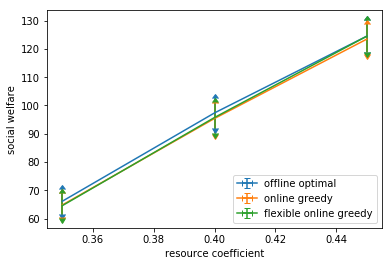

In [54]:
# Degrees of Freedom = n – 1, 
plt.errorbar(mean_oo.index, mean_oo, xerr = 0, 
             yerr = std_oo / np.sqrt(NoS) * stats.t.ppf(1-0.025, NoS -1), uplims =True, lolims = True)
plt.errorbar(mean_og.index, mean_og, xerr = 0, 
             yerr = std_og / np.sqrt(NoS) * stats.t.ppf(1-0.025, NoS -1), uplims =True, lolims = True)
plt.errorbar(mean_fog.index, mean_fog, xerr = 0, 
             yerr = std_fog / np.sqrt(NoS) * stats.t.ppf(1-0.025, NoS -1), uplims =True, lolims = True)

# plt.errorbar(mean_sp.index, mean_sp, xerr = 0, yerr = std_sp * 2.024, uplims =True, lolims = True)
# plt.errorbar(mean_ogwf.index, mean_ogwf, xerr = 0, yerr = std_ogwf * 2.201, uplims =True, lolims = True)

# plt.legend(['offline optimal','online greedy','SWMOA', 'flexible online greedy'], loc = 'lower right')
plt.legend(['offline optimal','online greedy','flexible online greedy'],
           loc = 'lower right')
plt.xlabel("resource coefficient")
plt.ylabel("social welfare")

# setting y axis limit
axes = plt.gca()
# axes.set_ylim([0,150])

plt.show
# plt.savefig('comparison of four algorithms.png')

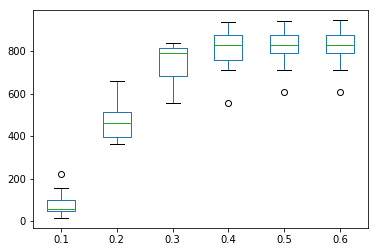

In [9]:
figure = result_oo.boxplot(column = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6], grid = False)
figure

In [10]:
result_ogf = pd.read_csv("ogf.csv", names =[0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
result_ogf

,0.1,0.2,0.3,0.4,0.5,0.6
0,14.804852,332.890855,652.369911,746.533202,777.027914,792.476771
1,56.521479,370.154354,493.321468,528.951987,589.274848,594.596347
2,47.411757,407.639529,711.373646,816.137509,862.060722,866.744365
3,100.571917,326.468696,619.003658,740.686540,806.678539,812.698734
4,23.902616,321.094077,522.944716,612.995375,687.752965,710.076344
5,154.762243,480.981699,769.852791,851.784412,873.735865,876.118105
6,72.933631,444.426765,699.576083,780.564186,871.350049,888.037135
7,220.364277,574.035761,755.896787,875.784334,916.232126,930.780785
8,52.719876,383.106946,574.283435,696.686036,767.569875,776.806368
9,50.178481,349.119487,632.016703,732.477321,798.342159,821.735499


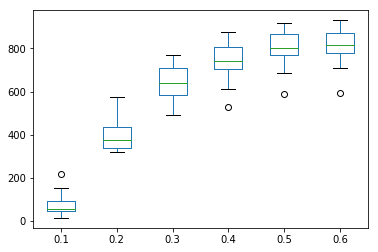

In [12]:
figure = result_ogf.boxplot(column = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6], grid = False)
figure